In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Reading the dataset
data = pd.read_csv('Train_UWu5bXk.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Calculating percentage of missing values
null_perc = data.isnull().sum() / len(data) * 100
column_name = data.columns
new_columns_names = []
for i in range(0, len(null_perc)):
    if null_perc[i] < 20:
        new_columns_names.append(column_name[i])
        
X = data[new_columns_names]
X

C:\Users\REZA\AppData\Local\Temp\ipykernel_20148\1277488256.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if null_perc[i] < 20:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# Calculating variances of the selected columns
X.var().round(2)

In [ ]:
# Selecting columns with variance greater than 1
variances = X.var()
column_name = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
new_columns_names = []
for i in range(0, len(variances)):
    if variances[i] > 1:
        new_columns_names.append(column_name[i])
        
new_columns_names

In [ ]:
# Calculating skewness of the selected columns
X.skew()

In [ ]:
# Selecting columns with skewness between -0.5 and 0.5
skewness = X.skew()
column_name = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
new_columns_names = []
for i in range(0, len(skewness)):
    if skewness[i] < 0.5 and skewness[i] > -0.5:
        new_columns_names.append(column_name[i])
        
new_columns_names

In [ ]:
# Calculating kurtosis of the selected columns
X.kurtosis()

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

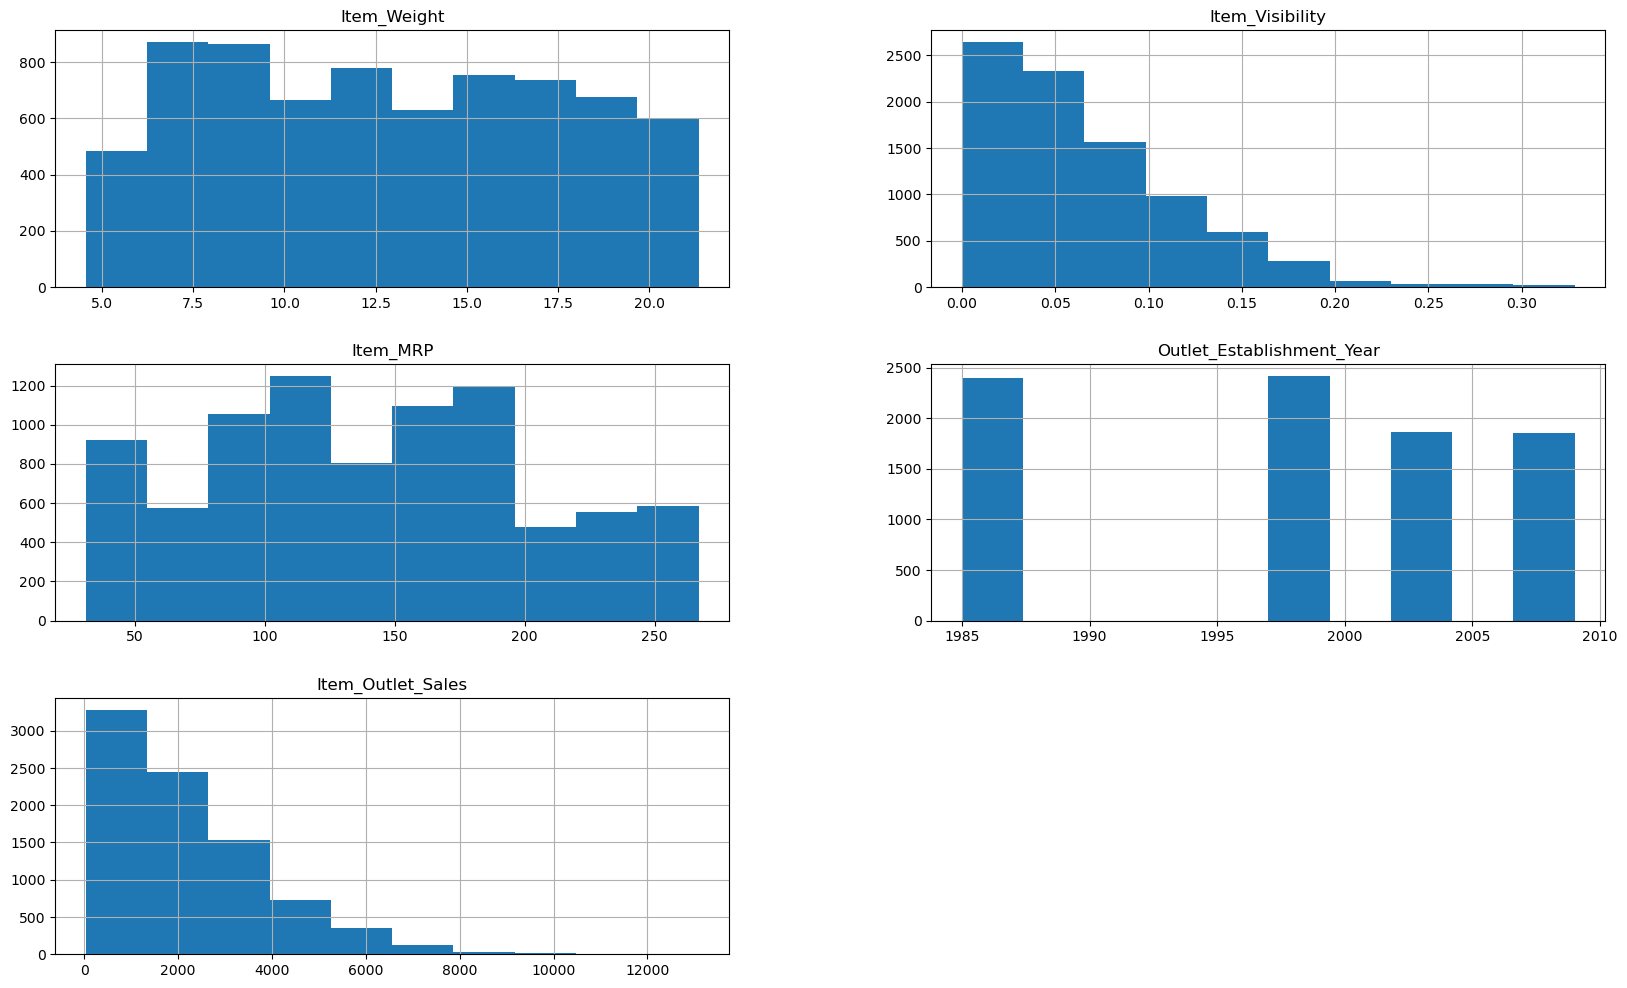

In [11]:
# Visualizing histograms of the selected columns
data.hist(figsize=(20, 12))

In [12]:
# Importing necessary libraries
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Selecting features and target variable
X = data[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
y = data['Item_Outlet_Sales']

In [14]:
# Scaling continuous features
X_Scaled = X.copy()
cont_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
scaler = StandardScaler()
X_Scaled = X_Scaled[cont_cols]
X_Scaled = scaler.fit_transform(X_Scaled)
print(X_Scaled)

[[-0.7662174  -0.97073217  1.74745381  0.13954076]
 [-1.49417499 -0.90811123 -1.48902325  1.33410274]
 [ 0.99983356 -0.95691733  0.01004021  0.13954076]
 ...
 [-0.48623371 -0.59978449 -0.89720755  0.73682175]
 [-1.21634502  1.53287976 -0.60797692  1.33410274]
 [ 0.41832897 -0.41193591 -1.05226104 -0.09937163]]


In [15]:
# Replacing original columns with scaled columns
X[cont_cols] = X_Scaled

C:\Users\REZA\AppData\Local\Temp\ipykernel_20148\2296627068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cont_cols] = X_Scaled


In [16]:
# Filling missing values in 'Outlet_Size' column with mode
X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0], inplace=True)

C:\Users\REZA\AppData\Local\Temp\ipykernel_20148\434040182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0], inplace=True)


In [17]:
# Checking for missing values
X.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2323)

In [ ]:
# Creating and fitting the CatBoostRegressor model
model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=8, task_type='GPU', eval_metric='MAE')
model.fit(X_train, y_train, cat_cols_indexes, eval_set=(X_test, y_test), plot=True)

In [20]:
# Standard deviation of the target variable
y.std()

1706.499615733832